In [1]:
from keras.applications import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import numpy as np

In [2]:
train_ds = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input)


validation_ds = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input)


train_ds = train_ds.flow_from_directory('../../Baseline_Training_Set/train/',
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical')


validation_ds = validation_ds.flow_from_directory('../../Baseline_Training_Set/validation/',
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical')



Found 22320 images belonging to 15 classes.
Found 2790 images belonging to 15 classes.


In [3]:
NUM_CLASSES = 15


# Load the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False
    

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [6]:
# Unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

707

In [4]:
model.fit(train_ds, epochs=1, validation_data=validation_ds)

349/349 [==============================] - 95s 217ms/step - loss: 0.5905 - accuracy: 0.8077 - val_loss: 0.4253 - val_accuracy: 0.8495


In [9]:
validation_dataset = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input)

validation_dataset = validation_dataset.flow_from_directory('../../Baseline_Training_Set/test/',
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        shuffle=False,
                                                        )




Found 2790 images belonging to 15 classes.


In [9]:
evaluation = model.evaluate(
    validation_dataset,
    batch_size=32,
    verbose="auto"
)

evaluation

88/88 [==============================] - 16s 173ms/step - loss: 11.6405 - categorical_accuracy: 0.3226 - accuracy: 0.3226


[11.64053726196289, 0.32258063554763794, 0.32258063554763794]

In [10]:

# Use the model to make predictions on the validation set
validation_predictions = model.predict(validation_dataset)
processed_validation_predictions = np.argmax(validation_predictions, axis=-1)

44/44 [==============================] - 10s 181ms/step


In [11]:
# Create the confusion matrix
matrix = np.array(tf.math.confusion_matrix(
    validation_dataset.classes,
    processed_validation_predictions,
))

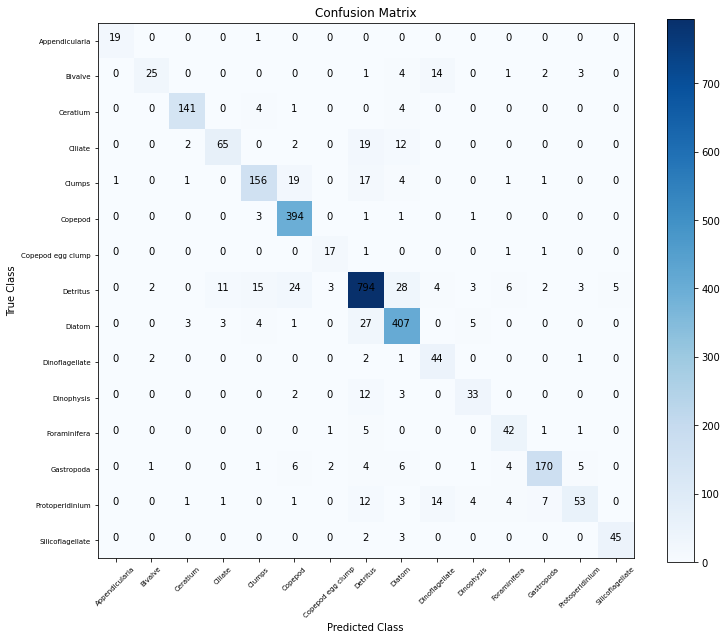

In [12]:
from confusion_matrix import plot_confusion_matrix


class_names = [
    "Appendicularia",
    "Bivalve",
    "Ceratium",
    "Ciliate",
    "Clumps",
    "Copepod",
    "Copepod egg clump",
    "Detritus",
    "Diatom",
    "Dinoflagellate",
    "Dinophysis",
    "Foraminifera",
    "Gastropoda",
    "Protoperidinium",
    "Silicoflagellate"
]
plot_confusion_matrix(matrix, class_names=class_names)



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.440162 to fit



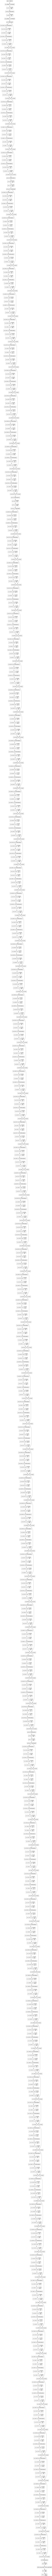

In [9]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)